In [30]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/fitness.csv')

In [31]:
df.keys()

Index(['date', 'age', 'gender', 'height', 'weight', 'steps', 'hear_rate',
       'calories', 'distance', 'steps_times_distance', 'activity'],
      dtype='object')

In [32]:
df.head()

,date,age,gender,height,weight,steps,hear_rate,calories,distance,steps_times_distance,activity
0,2019-01-01,20,1,168,65.4,10.771429,78.531302,0.344533,0.008327,0.089692,Lying
1,2019-01-02,20,1,168,65.4,11.475325,78.453390,3.287625,0.008896,0.102088,Lying
2,2019-01-03,20,1,168,65.4,12.179221,78.540825,9.484000,0.009466,0.115287,Lying
3,2019-01-04,20,1,168,65.4,12.883117,78.628260,10.154556,0.010035,0.129286,Lying
4,2019-01-05,20,1,168,65.4,13.587013,78.715695,10.825111,0.010605,0.144088,Lying


In [33]:
df.tail()

,date,age,gender,height,weight,steps,hear_rate,calories,distance,steps_times_distance,activity
360,2019-12-27,19,0,172,72.5,12.519481,78.625042,0.470516,0.009457,0.118399,Running 7 METs
361,2019-12-28,23,1,181,95.2,10.771429,78.531302,0.344533,0.008327,0.089692,Lying
362,2019-12-29,23,1,181,95.2,12.574603,78.453390,3.287625,0.009872,0.124132,Lying
363,2019-12-30,23,1,181,95.2,14.377778,78.154238,6.465719,0.011416,0.164143,Lying
364,2019-12-31,23,1,181,95.2,16.180952,77.855085,9.643813,0.012961,0.209725,Lying


In [34]:
df.shape

(365, 11)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  365 non-null    object 
 1   age                   365 non-null    int64  
 2   gender                365 non-null    int64  
 3   height                365 non-null    int64  
 4   weight                365 non-null    float64
 5   steps                 365 non-null    float64
 6   hear_rate             365 non-null    float64
 7   calories              365 non-null    float64
 8   distance              365 non-null    float64
 9   steps_times_distance  365 non-null    float64
 10  activity              365 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 31.5+ KB


In [36]:
df.isnull().sum()

date                    0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
steps_times_distance    0
activity                0
dtype: int64

**Retrieving Unique Classes**

In [37]:
df['activity'].unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

**Feature Engineering for Date**

In [38]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


df['day_of_week'] = df['date'].dt.dayofweek

**Data Normalization**

In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
num_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.to_csv('normalized_dataset.csv', index=False)

**Replacing categorical classes to numerical**

In [40]:
df['activity'].replace(['Lying', 'Sitting', 'Self Pace walk', 
                        'Running 3 METs','Running 5 METs', 
                        'Running 7 METs'],[1,2,3,4,5,6], inplace=True)


**Data Split**

In [41]:
from sklearn.model_selection import train_test_split
x=df[['year', 'month','day', 'day_of_week','age', 'gender', 'height', 'weight', 'steps', 'hear_rate',
       'calories', 'distance', 'steps_times_distance']]   
y=df['activity'] 


In [42]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split (x,y,test_size = 0.3)

**AdaBoost Classifier**

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 

Accuracy Obtained using Ada Boost: 0.8909090909090909

 



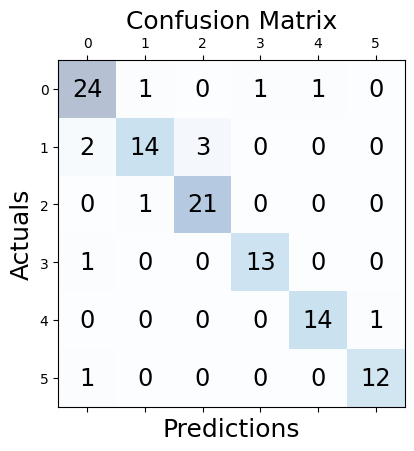

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
base_estimator = DecisionTreeClassifier(max_depth=8)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost.fit(x_train, y_train)
pred1 = adaboost.predict(x_test)
accuracy = accuracy_score(y_test, pred1)
print('\n \n')
print('Accuracy Obtained using Ada Boost:', accuracy)
print('\n \n')

conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred1)
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Random Forest Classifier**

Accuracy: 0.8454545454545455


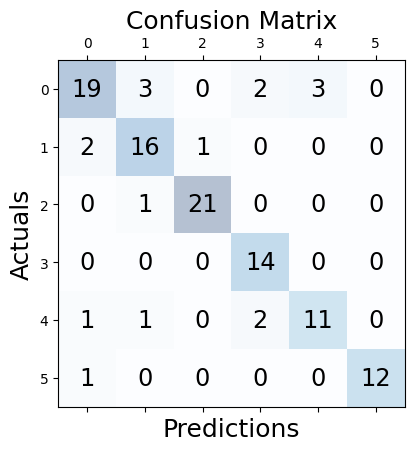

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
pred2 = rf_model.predict(x_test)
accuracy = rf_model.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred2)
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Gradient Boosting Classifier**

Accuracy: 0.7909090909090909


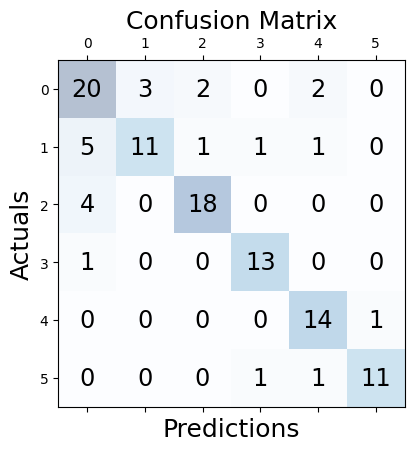

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(x_train, y_train)
pred3 = gb_model.predict(x_test)
accuracy = gb_model.score(x_test, y_test)
print(f"Accuracy: {accuracy}")


conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred3)
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Bagging Classifier**

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8090909090909091


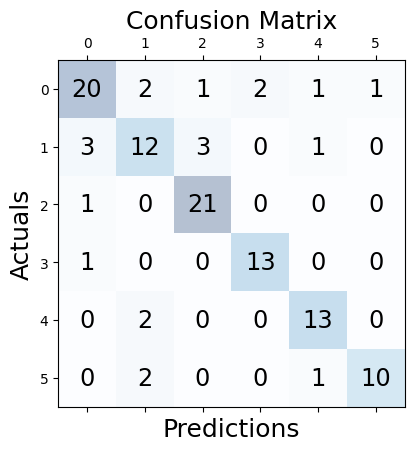

In [46]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42,max_depth=10)
bagging = BaggingClassifier(base_estimator=tree, n_estimators=50, random_state=42)
bagging.fit(x_train, y_train)
pred4 = bagging.predict(x_test)
accuracy = accuracy_score(y_test, pred4)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred4)
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**KNN Classifier**

Accuracy: 0.6363636363636364


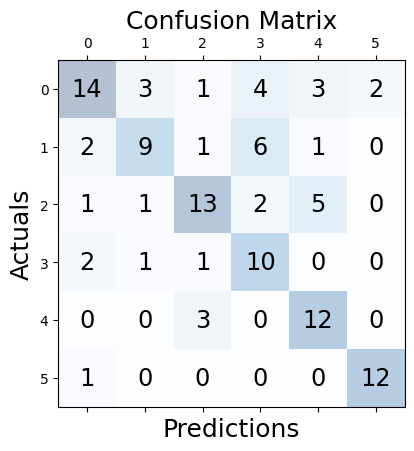

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred5 = knn.predict(x_test)
accuracy = accuracy_score(y_test, pred5)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred5)
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [55]:
import pandas as pd
accuracy_values = [0.890, 0.854, 0.790, 0.809, 0.636]
data = {'Model': ['AdaBoost Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Bagging Classifier', 'KNeighbors Classifier'],
        'Accuracy': accuracy_values}
df = pd.DataFrame(data)

df


,Model,Accuracy
0,AdaBoost Classifier,0.890
1,Random Forest Classifier,0.854
2,Gradient Boosting Classifier,0.790
3,Bagging Classifier,0.809
4,KNeighbors Classifier,0.636
